In [79]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Evalution 
from sklearn.metrics import mean_squared_error, r2_score


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")


In [80]:
titanic=pd.read_csv(r'D:\New folder\train.csv')

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
titanic.shape

(891, 12)

In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Missing Values**

In [87]:
total_missing=titanic.isnull().sum()
total_missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


**Correlation between Age and Sex**

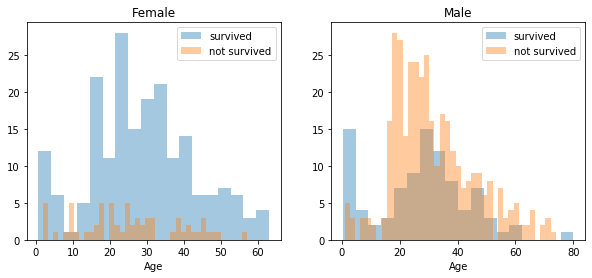

In [89]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


**Correlaion between Embarked, Pclass and Sex**

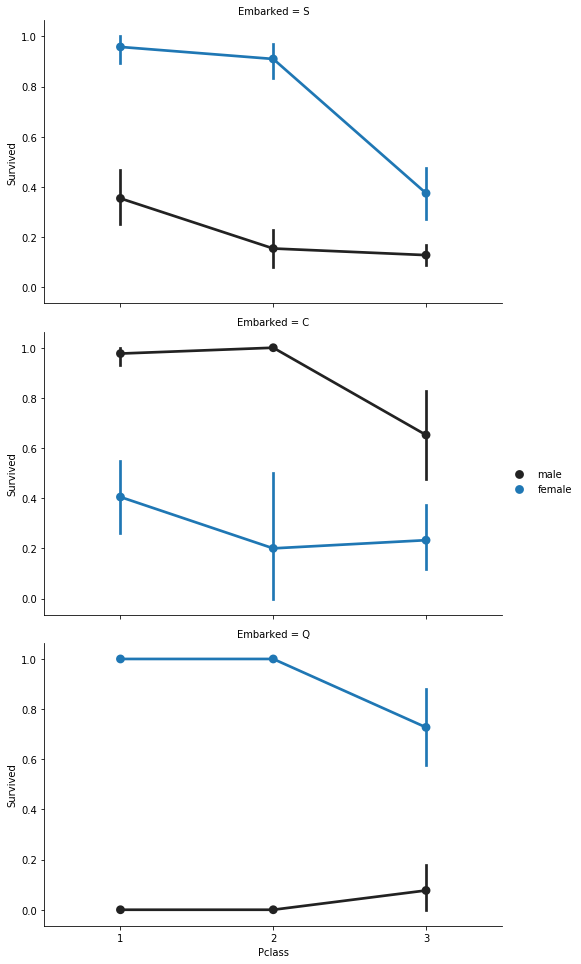

In [90]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

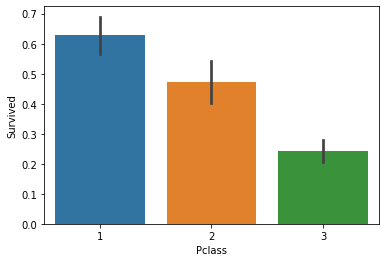

In [91]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

&nbsp;
&nbsp;
&nbsp;
&nbsp;

Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

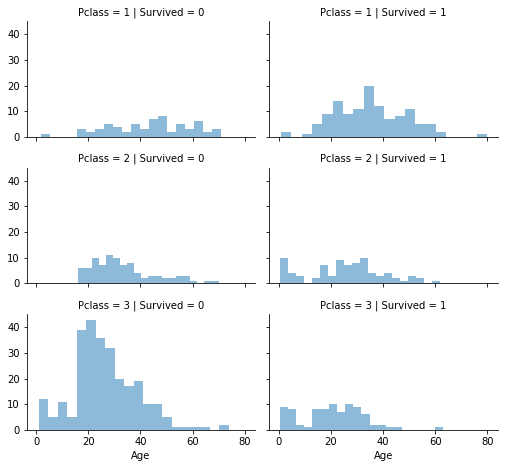

In [92]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


&nbsp;
&nbsp;
&nbsp;
&nbsp;

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. 

In [93]:
data = [titanic]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

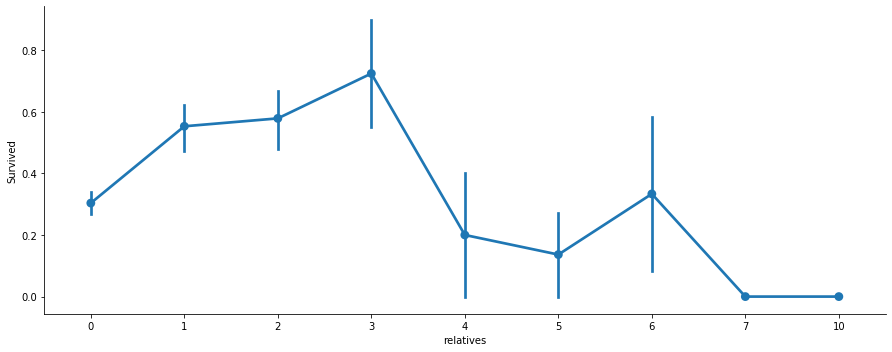

In [94]:
axes = sns.factorplot('relatives','Survived', 
                      data=titanic, aspect = 2.5, )


SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. 

&nbsp;
&nbsp;
&nbsp;
&nbsp;

**Data Preprocessing**

drop PassengerId from the train set, because it does not contribute to a persons survival probability. 

In [95]:
titanic = titanic.drop(['PassengerId'], axis=1)

&nbsp;
&nbsp;
&nbsp;
&nbsp;
cabin number looks like ‘C123’ and the letter refers to the deck,create a new feature that contains a persons deck.

In [96]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [titanic]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
titanic = titanic.drop(['Cabin'], axis=1)



In [97]:
data = [titanic]

for dataset in data:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)
titanic["Age"].isnull().sum()


0

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [98]:
titanic['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [99]:
common_value = 'S'
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


In [100]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [101]:
data = [titanic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


&nbsp;
&nbsp;
&nbsp;

 use the Name feature to extract the Titles from the Name to build a new feature out of that.

In [102]:
data = [titanic]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
titanic = titanic.drop(['Name'], axis=1)


&nbsp;
&nbsp;
&nbsp;

Convert Sex feature into numeric.

In [103]:
genders = {"male": 0, "female": 1}
data = [titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [104]:
titanic['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

&nbsp;
&nbsp;
&nbsp;
&nbsp;

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So drop it from the dataset.

In [105]:
titanic = titanic.drop(['Ticket'], axis=1)

&nbsp;
&nbsp;
&nbsp;

Convert Embarked feature into numeric.

In [106]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


In [107]:
data = [titanic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [108]:
data = [titanic]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [109]:
data = [titanic]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']


In [110]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


In [111]:
X_train = titanic.drop("Survived", axis=1)
Y_train = titanic["Survived"]
# Split the data for train and test 
X_train, X_test, Y_train, y_test = train_test_split(X_train, Y_train , train_size = 0.8, random_state = 100)   # 70-30 Split


In [112]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [114]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_train) 
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [115]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_train) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [116]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_train)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)


In [117]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_train)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [118]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.12,Random Forest
93.12,Decision Tree
87.08,KNN
82.44,Support Vector Machines
81.74,Logistic Regression
77.53,Naive Bayes


In [119]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.81944444 0.73611111 0.81944444 0.83333333 0.86111111 0.85915493
 0.81690141 0.77142857 0.75714286 0.81428571]
Mean: 0.8088357925329757
Standard Deviation: 0.03942719345391702


Our model has a average accuracy of 80% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .the highest accuracy is found in random forest and decision tree